**Mengclone data yang sudah disimpan pada repository github untuk diinput pada colab**

In [35]:
!git clone https://github.com/RifaldiAchmad/Analisis-Media-Sosial.git

fatal: destination path 'Analisis-Media-Sosial' already exists and is not an empty directory.


**Install library igraph untuk bisa diimport yang nanti akan digunakan untuk visualisasi graf**

In [36]:
!pip install igraph

**Import modul/library yang dibutuhkan**

In [37]:
import pandas  as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig

# **EDA**

**Input data dari repository github ke dalam variabel link dan hapus kolom "value"**

In [38]:
# Masukkan data edges
link = pd.read_csv('/content/Analisis-Media-Sosial/stack_network_links.csv')

# Menghapus kolom "value"
link.drop(columns=['value'], inplace=True)
link

,source,target
0,azure,.net
1,sql-server,.net
2,asp.net,.net
3,entity-framework,.net
4,wpf,.net
...,...,...
485,objective-c,xcode
486,swift,xcode
487,iphone,xcode
488,ios,xcode


**- Project ini memakai jenis data dimana data "link" merupakan representasi dari edges**

**- Kolom source-target pada data edges mewakili edge pada pembentukan graf**

**- Kolom value pada data edges tidak dipakai**

In [39]:
# Konversi kolom menjadi string
link['source'] = link['source'].astype(str)
link['target'] = link['target'].astype(str)

# Membuat graf dari kolom "source" dan kolom "targert"
edges = list(zip(link['source'], link['target']))
g = ig.Graph.TupleList(edges, directed=False)

# Algoritma Walktrap
walktrap = g.community_walktrap()
group = walktrap.as_clustering()
print(group)

Clustering with 115 elements and 14 clusters
[ 0] azure, .net, sql-server, asp.net, entity-framework, wpf, linq, wcf, c#,
     asp.net-web-api, sql, mvc, vb.net, xamarin, unity3d, visual-studio,
     oracle, plsql
[ 1] tdd, agile
[ 2] codeigniter, ajax, jquery, mysql, css, php, javascript, json, angularjs,
     ionic-framework, sass, twitter-bootstrap, html5, bootstrap, laravel,
     wordpress, photoshop, html, less, drupal, twitter-bootstrap-3, xml,
     vue.js
[ 3] cloud, amazon-web-services, devops, docker, jenkins, go
[ 4] ios, android, android-studio, swift, osx, objective-c, iphone, xcode
[ 5] java, rest, api, maven, eclipse, jsp, hibernate, spring-boot, web-
     services, spring-mvc, java-ee, spring
[ 6] typescript, angular, angular2
[ 7] reactjs, mongodb, express, node.js, postgresql, redis, elasticsearch,
     redux, react-native, ruby-on-rails, ruby
[ 8] nginx, apache, linux, bash, shell, git, github, unix, ubuntu, windows,
     powershell
[ 9] scala, apache-spark, hadoop, h

**- Melakukan algoritma walktrap untuk mengelompokkan tag-tag tersebut ke dalam beberapa group/community**

**- Dapat dilihat dari data didapatkan 14 gorup/community**

**- Masing-masing group/community memiliki jumlah tag yang berbeda-beda**

In [40]:
# Membuat dataframe untuk menyimpan nilai unik dari data edges dan hasil label group dari algoritma Walktrap
data = []
for group_id, cluster in enumerate(group):
    for item in cluster:
        data.append((g.vs[item]['name'], group_id + 1))

test = pd.DataFrame(data, columns=['name', 'group'])
test

,name,group
0,azure,1
1,.net,1
2,sql-server,1
3,asp.net,1
4,entity-framework,1
...,...,...
110,excel-vba,12
111,regex,13
112,perl,13
113,testing,14


**- Ini merupakan dataframe hasil algoritma walktrap**

**- Dataframe ini mewakili nodes pada pembentukan graf**

**- Kolom group pada data nodes merupakan hasil dari algoritma walktrap**

In [41]:
# Melihat banyaknya edge dan node
num_nodes = len(test)
num_links = len(link)

# Membuat DataFrame
summary_df = pd.DataFrame({'Metric': ['Nodes', 'Edges'],
                           'Value': [num_nodes, num_links]})
summary_df

,Metric,Value
0,Nodes,115
1,Edges,490


**- Terdapat 115 jumlah nodes dan 490 jumlah edges**

**- Ini yang akan digunakan pada analisis graf nanti**

In [42]:
# Membuat list untuk menyimpan data node dan group
nodes = []
for idx, membership in enumerate(group.membership):
    node_name = g.vs[idx]['name']
    nodes.append({'Node': node_name, 'group': membership+1})

# Membuat DataFrame dari list nodes
nodes_df = pd.DataFrame(nodes)

In [43]:
nodes_df

,Node,group
0,azure,1
1,.net,1
2,sql-server,1
3,asp.net,1
4,entity-framework,1
...,...,...
110,ruby-on-rails,8
111,ruby,8
112,powershell,9
113,testing,14


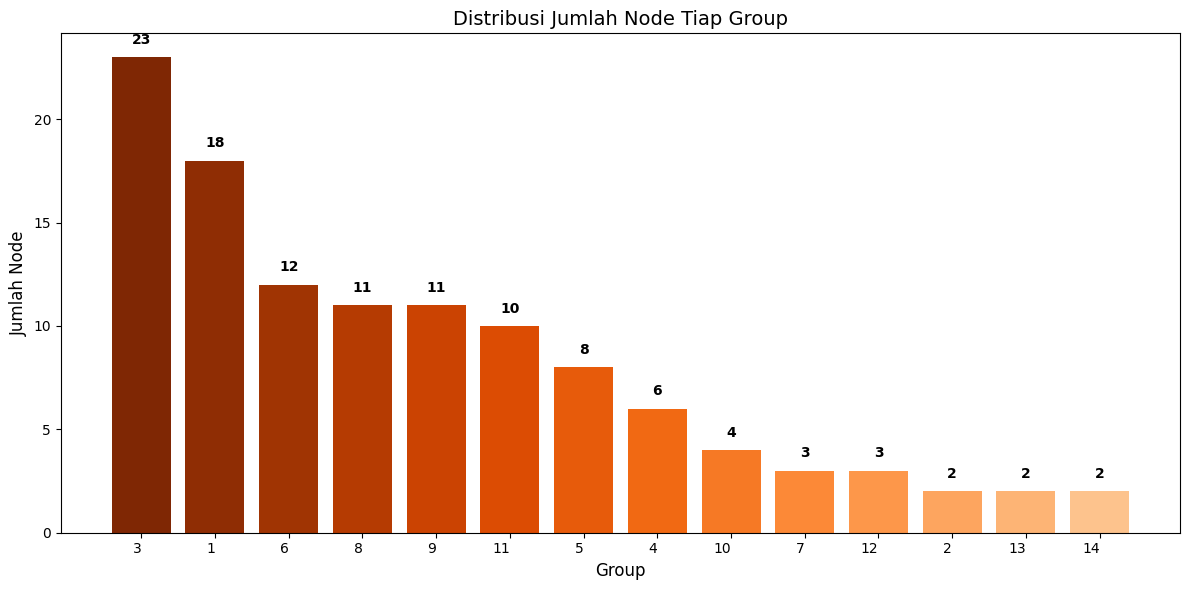

In [44]:
# Ensure groups start from 1
nodes_df['group'] = nodes_df['group'].astype(int)

# Calculate unique counts, group numbering starts from 1
unique_counts = nodes_df.groupby('group').size().to_dict()
counts_df = pd.DataFrame(list(unique_counts.items()), columns=['group', 'count'])

# Sort DataFrame
counts_df = counts_df.sort_values(by='count', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('Oranges')
colors = cmap(np.linspace(1, 0.3, len(counts_df)))  # Darker to lighter orange

bars = plt.bar(counts_df['group'].astype(str), counts_df['count'], color=colors)

# Labeling
plt.xlabel('Group', fontsize=12)
plt.ylabel('Jumlah Node', fontsize=12)
plt.title('Distribusi Jumlah Node Tiap Group', fontsize=14)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

# Adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show plot
plt.show()

**- Terlihat pada grafik di atas, anggota paling banyak terdapat pada group 2 yaitu sebanyak 23 tag.**

**- Sedangkan anggota paling sedikit terdapat pada group 1, 12, dan 13 yaitu hanya sebanyak 2 tag.**

# **CENTARLITY MEASURES**

## Degre Centrality

In [46]:
# Melihat nilai degree pada masing-masing nodes
g = nx.from_pandas_edgelist(link, source="source", target="target")
DC = nx.degree_centrality(g)
degree_df = pd.DataFrame(list(DC.items()), columns=['Node', 'degree centrality'])

# Mengurutkan degree_df secara descending berdasarkan degree centrality
degree_df = degree_df.sort_values(by='degree centrality', ascending=False)
degree_df

,Node,degree centrality
13,jquery,0.140351
8,c#,0.122807
15,css,0.122807
3,asp.net,0.114035
30,angularjs,0.114035
...,...,...
47,api,0.008772
82,github,0.008772
83,haskell,0.008772
19,cloud,0.008772


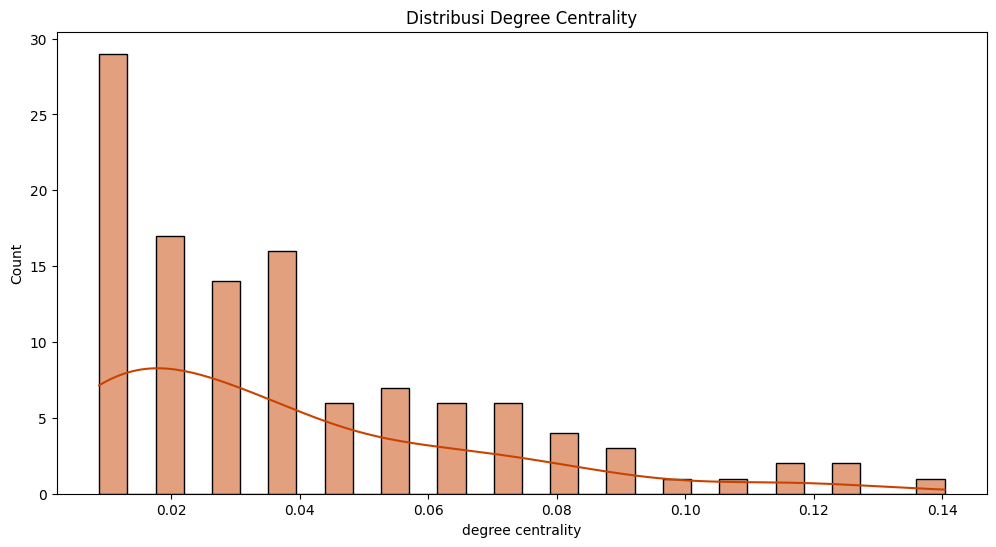

In [47]:
# Visualisasi distribusi nilai degree centrality pada nodes
plt.figure(figsize=(12, 6))
sns.histplot(degree_df['degree centrality'], bins=30, kde=True, color='#C94300')
plt.title('Distribusi Degree Centrality')
plt.show()

**Distribusi nilai degree pada data tag terlihat lebih tinggi ke kiri yang menandakan bahwa nilai degree cenderung kecil di bawah 0.10. Menandakan bahwa sebagian besar simpul memiliki relatif sedikit koneksi dengan simpul lainnya.**

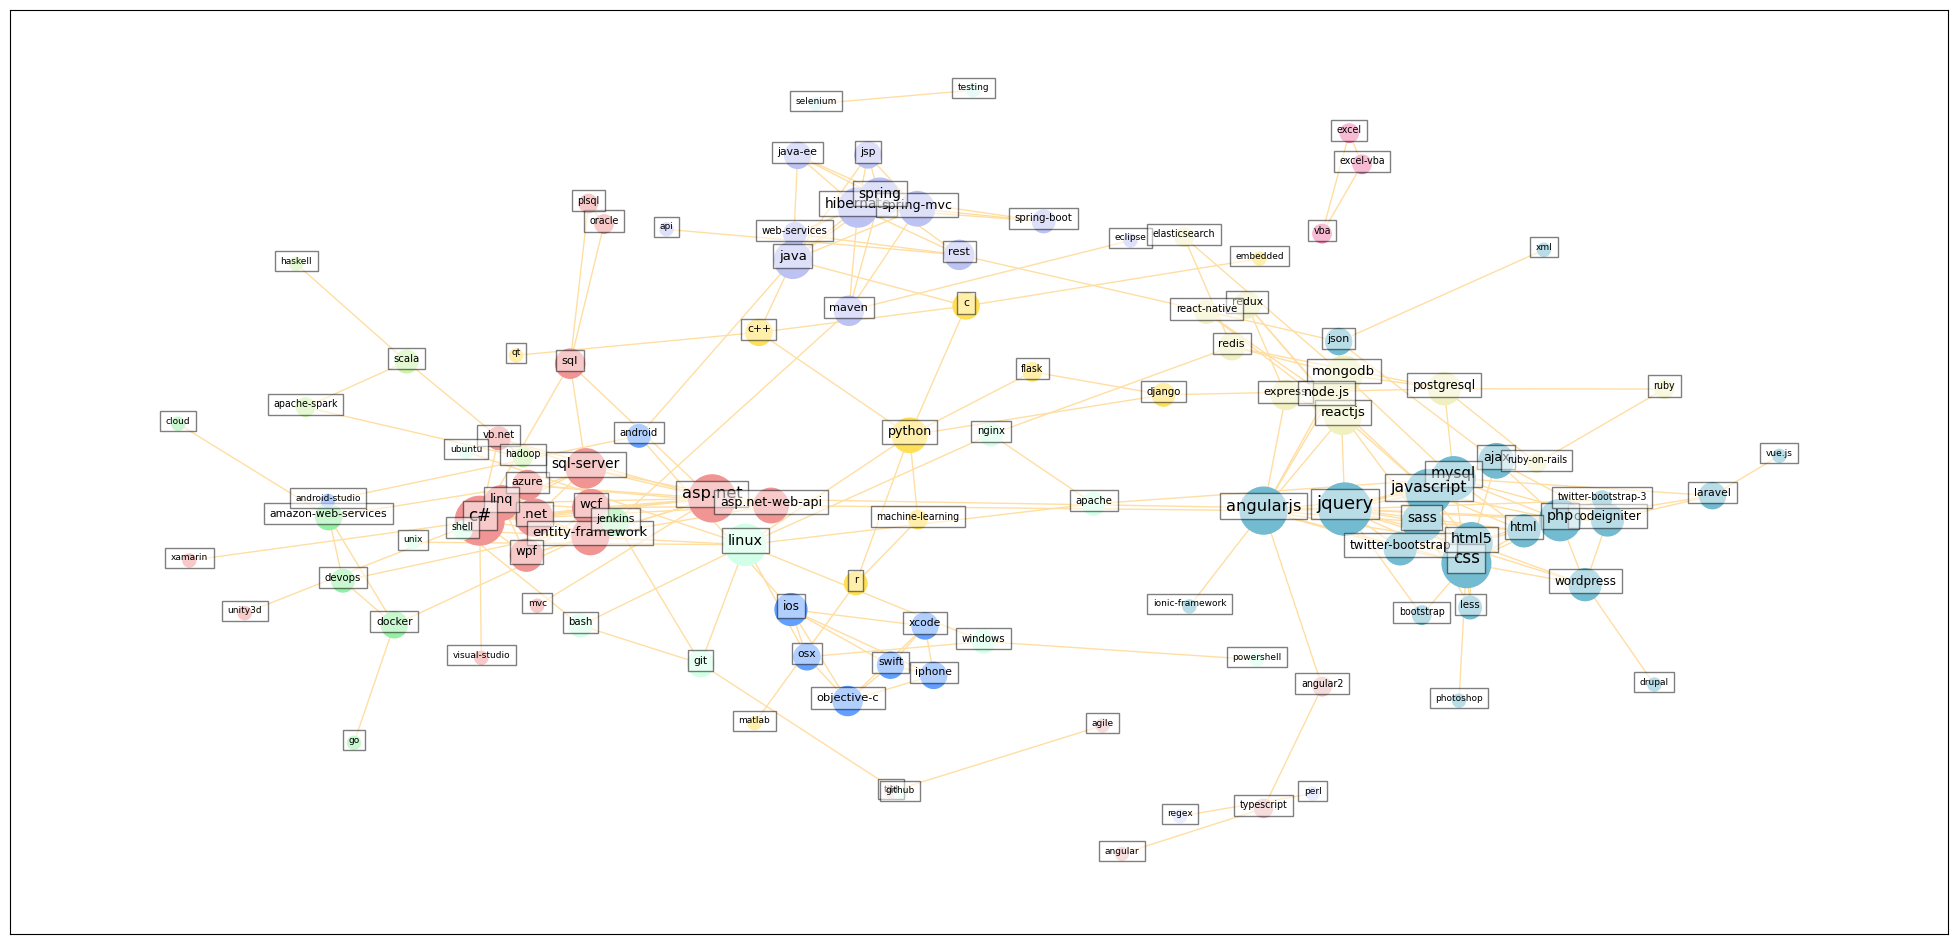

In [48]:
# Create edges and nodes for graph visualization
G = nx.Graph()
for index, row in test.iterrows():
    G.add_node(row["name"], group=row["group"])
for index, row in link.iterrows():
    G.add_edge(row["source"], row["target"])

# Merge degree centrality with node data
gabung = pd.merge(test, degree_df, how='left', left_on='name', right_on='Node')

# Drop unnecessary columns
clean = gabung.drop(columns=['Node'])

# Graph visualization
def draw_graph_with_degree(G, size):
    nodes = G.nodes()
    color_map = {
        1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff',
        6:'#bcc2f2', 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6',
        11:'#ffdf55', 12:'#ef77aa', 13:'#d6dcff', 14:'#d2f5f0'
    }
    node_color = [color_map[d['group']] for n, d in G.nodes(data=True)]

    # Adjusting the parameter k for better spacing between nodes
    pos = nx.spring_layout(G, k=1.1, iterations=200)

    # Use degree centrality to determine node size
    node_degree_centrality = clean.set_index('name')['degree centrality'].to_dict()

    # Scale node size based on degree centrality values
    node_size = [node_degree_centrality[node] * 10000 for node in nodes]

    plt.figure(figsize=size)
    nx.draw_networkx(
        G, pos=pos, node_color=node_color, node_size=node_size,
        edge_color='#FFDEA2', width=1, with_labels=False
    )

    # Adjust font size for labels based on degree centrality
    for node, (x, y) in pos.items():
        font_size = node_degree_centrality[node] * 50 + 6
        plt.text(
            x, y, s=node, bbox=dict(facecolor='white', alpha=0.5),
            horizontalalignment='center', fontsize=font_size
        )

    plt.show()

draw_graph_with_degree(G, size=(25, 12))

**Dari gambar visualisasi degree terlihat bahwa ukuran simpul yang besar tidak banyak. Namun simpul-simpul besar cenderung berada di group yang memiliki banyak anggota.**

## Betweenness Centrality

In [49]:
# Melihat nilai betweenness pada masing-masing nodes
g = nx.from_pandas_edgelist(link, source="source", target="target")
BC = nx.betweenness_centrality(g)
betweenness_df = pd.DataFrame(list(BC.items()), columns=['Node', 'betweenness centrality'])

# Mengurutkan betweenness_df secara descending berdasarkan betweenness centrality
betweenness_df = betweenness_df.sort_values(by='betweenness centrality', ascending=False)
betweenness_df

,Node,betweenness centrality
13,jquery,0.255540
42,linux,0.208402
14,mysql,0.197693
3,asp.net,0.174067
41,apache,0.130872
...,...,...
79,excel,0.000000
80,excel-vba,0.000000
82,github,0.000000
83,haskell,0.000000


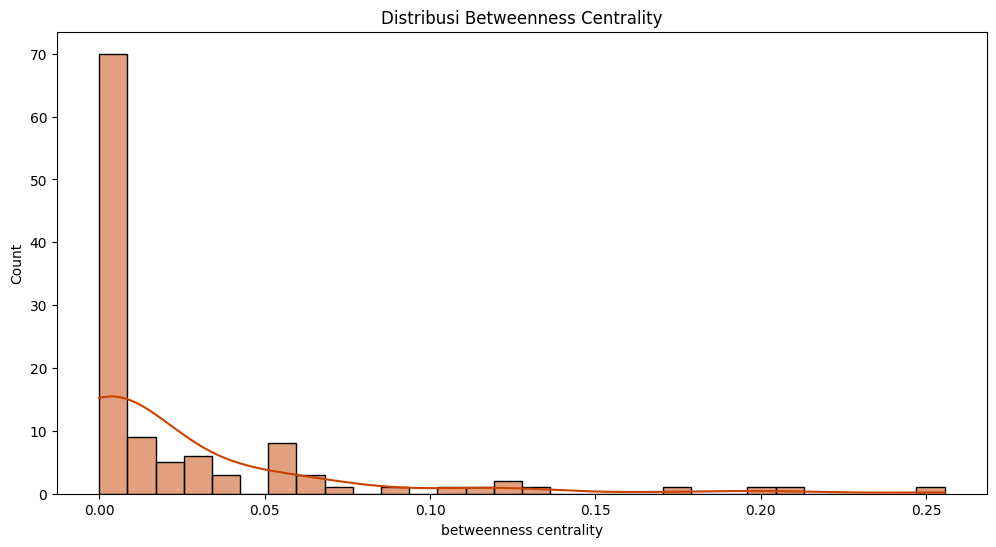

In [50]:
# Visualisasi distribusi nilai betweenness centrality pada nodes
plt.figure(figsize=(12, 6))
sns.histplot(betweenness_df['betweenness centrality'], bins=30, kde=True, color='#C94300')
plt.title('Distribusi Betweenness Centrality')
plt.show()

**Distribusi nilai betweenness pada data tag terlihat bahwa mayoritas simpul tidak memiliki nilai betweenness atau memiliki nilai 0. Menandakan bahwa kebanyakan simpul tidak berfungsi sebagai perantara atau penghubung dalam jaringan.**

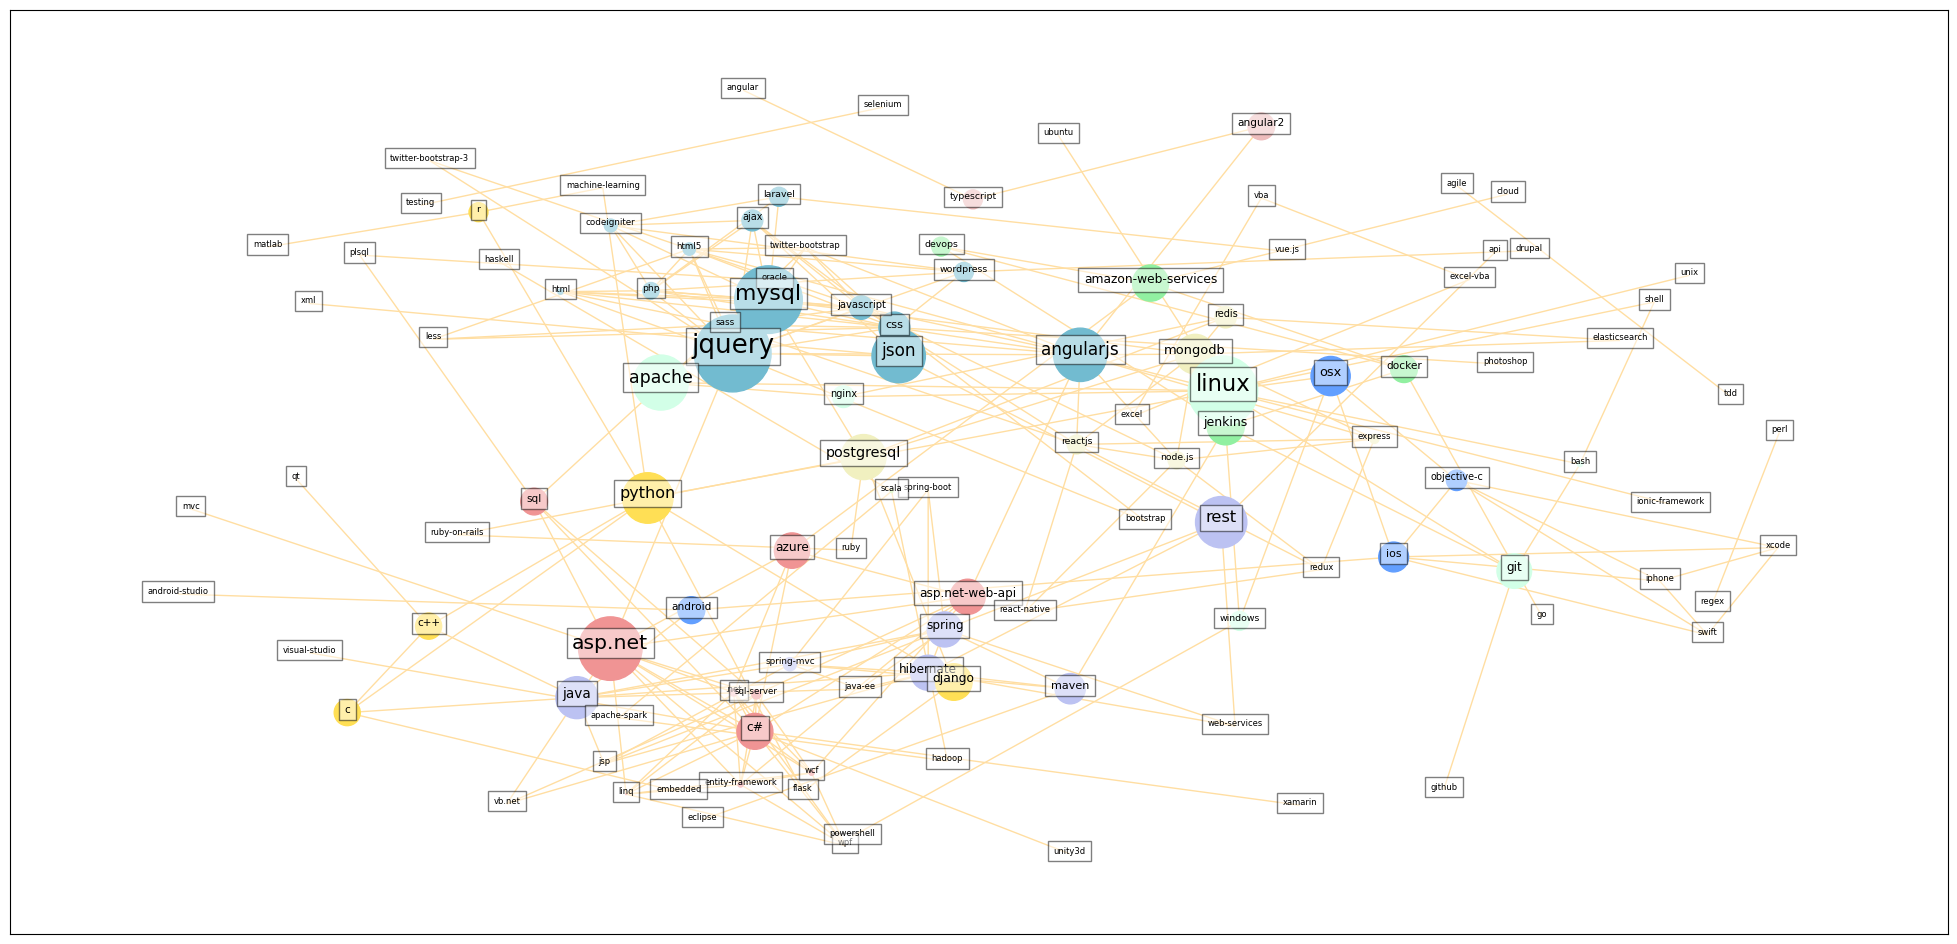

In [51]:
# Create edges and nodes for graph visualization
G = nx.Graph()
for index, row in test.iterrows():
    G.add_node(row["name"], group=row["group"])
for index, row in link.iterrows():
    G.add_edge(row["source"], row["target"])

# Merge betweenness centrality with node data
gabung2 = pd.merge(test, betweenness_df, how='left', left_on='name', right_on='Node')

# Drop unnecessary columns
clean2 = gabung2.drop(columns=['Node'])

# Graph visualization
def draw_graph_with_betweenness(G, size):
    nodes = G.nodes()
    color_map = {
        1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff',
        6:'#bcc2f2', 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6',
        11:'#ffdf55', 12:'#ef77aa', 13:'#d6dcff', 14:'#d2f5f0'
    }
    node_color = [color_map[d['group']] for n, d in G.nodes(data=True)]

    # Adjusting the parameter k for better spacing between nodes
    pos = nx.spring_layout(G, k=1, iterations=100)

    # Use betweenness centrality to determine node size
    node_betweenness_centrality = clean2.set_index('name')['betweenness centrality'].to_dict()

    # Scale node size based on betweenness centrality values
    node_size = [node_betweenness_centrality[node] * 12000 for node in nodes]

    plt.figure(figsize=size)
    nx.draw_networkx(
        G, pos=pos, node_color=node_color, node_size=node_size,
        edge_color='#FFDEA2', width=1, with_labels=False
    )

    # Adjust font size for labels based on betweenness centrality
    for node, (x, y) in pos.items():
        font_size = node_betweenness_centrality[node] * 50 + 6
        plt.text(
            x, y, s=node, bbox=dict(facecolor='white', alpha=0.5),
            horizontalalignment='center', fontsize=font_size
        )

    plt.show()

draw_graph_with_betweenness(G, size=(25, 12))

**Dari gambar visualisasi betweenness terlihat bahwa mayoritas adalah simpul-simpul kecil. Sangat sedikit simpul besar yang terlihat.**

## **Closeness Centrality**

In [52]:
  # Melihat nilai closeness pada masing-masing nodes
g = nx.from_pandas_edgelist(link, source="source", target="target")
CC = nx.closeness_centrality(g)
closeness_df = pd.DataFrame(list(CC.items()), columns=['Node', 'closeness centrality'])

# Mengurutkan closeness_df secara descending berdasarkan closeness centrality
closeness_df = closeness_df.sort_values(by='closeness centrality', ascending=False)
closeness_df

,Node,closeness centrality
13,jquery,0.289587
14,mysql,0.277896
12,ajax,0.258620
15,css,0.257875
17,javascript,0.257133
...,...,...
10,agile,0.008772
108,regex,0.008772
109,perl,0.008772
113,testing,0.008772


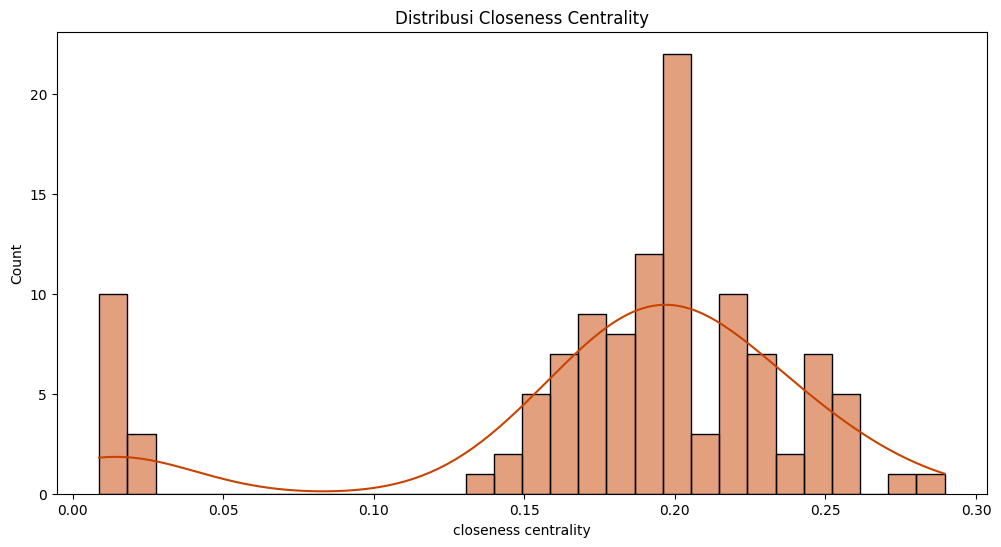

In [53]:
# Visualisasi distribusi nilai closeness centrality pada nodes
plt.figure(figsize=(12, 6))
sns.histplot(closeness_df['closeness centrality'], bins=30, kde=True, color='#C94300')
plt.title('Distribusi Closeness Centrality')
plt.show()

**Distribusi nilai closeness pada data tag terlihat bahwa simpul terdistribusi dengan cukup baik, mayoritas sedang, tidak terlalu kecil dan tidak terlalu besar. Menandakan bahwa simpul relatif mudah diakses atau terhubung secara efisien dengan simpul lainnya dalam jaringan**

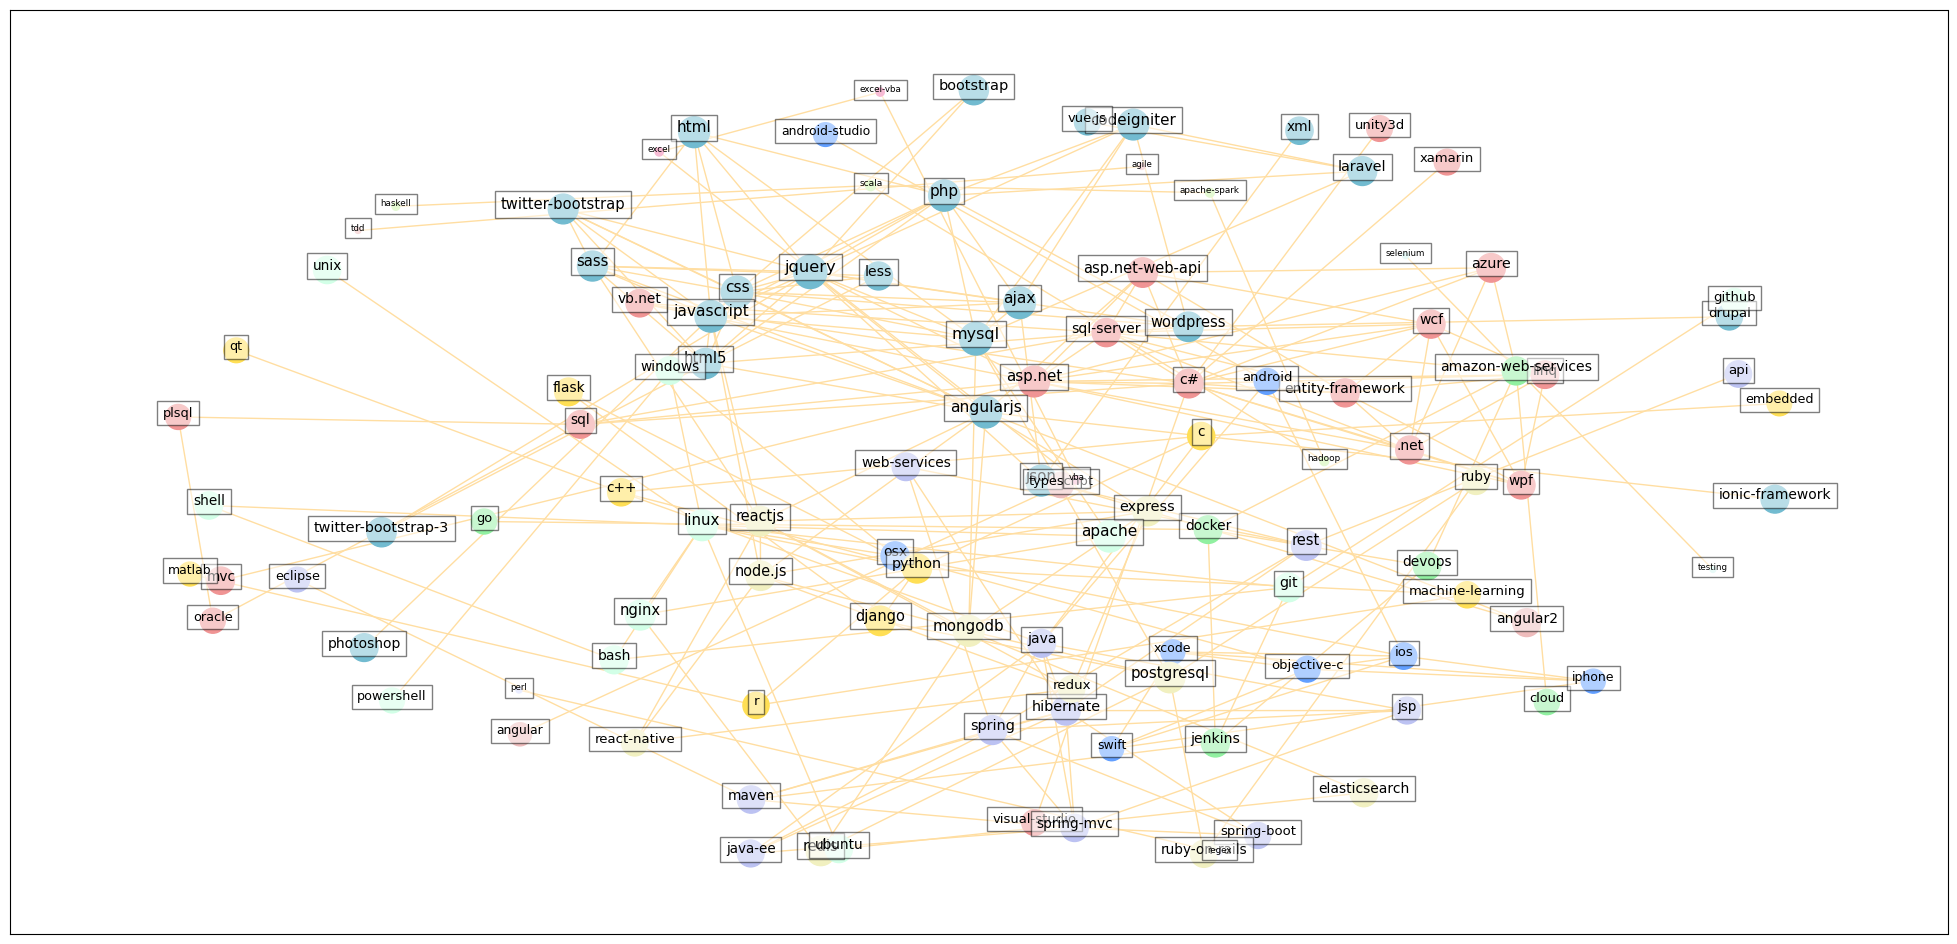

In [54]:
# Create edges and nodes for graph visualization
G = nx.Graph()
for index, row in test.iterrows():
    G.add_node(row["name"], group=row["group"])
for index, row in link.iterrows():
    G.add_edge(row["source"], row["target"])

# Merge closeness centrality with node data
gabung3 = pd.merge(test, closeness_df, how='left', left_on='name', right_on='Node')

# Drop unnecessary columns
clean3 = gabung3.drop(columns=['Node'])

# Graph visualization
def draw_graph_with_closeness(G, size):
    nodes = G.nodes()
    color_map = {
        1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff',
        6:'#bcc2f2', 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6',
        11:'#ffdf55', 12:'#ef77aa', 13:'#d6dcff', 14:'#d2f5f0'
    }
    node_color = [color_map[d['group']] for n, d in G.nodes(data=True)]

    # Adjusting the parameter k for better spacing between nodes
    pos = nx.spring_layout(G, k=1.2, iterations=100)

    # Use closeness centrality to determine node size
    node_closeness_centrality = clean3.set_index('name')['closeness centrality'].to_dict()

    # Scale node size based on closeness centrality values
    node_size = [node_closeness_centrality[node] * 2000 for node in nodes]

    plt.figure(figsize=size)
    nx.draw_networkx(
        G, pos=pos, node_color=node_color, node_size=node_size,
        edge_color='#FFDEA2', width=1, with_labels=False
    )

    # Adjust font size for labels based on closeness centrality
    for node, (x, y) in pos.items():
        font_size = node_closeness_centrality[node] * 20 + 6
        plt.text(
            x, y, s=node, bbox=dict(facecolor='white', alpha=0.5),
            horizontalalignment='center', fontsize=font_size
        )

    plt.show()

draw_graph_with_closeness(G, size=(25, 12))

**Dari gambar visualisasi closeness terlihat bahwa hampir semua node berukuran sama. Jarang terlihat simpul yang terlalu kecil dan terlalu besar.**

In [55]:
# Mengukur centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Membuat dataframe dari perhitungan centrality dan group
centrality_data = {
    'Node': list(G.nodes),
    'degree': [degree_centrality[node] for node in G.nodes],
    'closeness': [closeness_centrality[node] for node in G.nodes],
    'betweenness': [betweenness_centrality[node] for node in G.nodes]
}
centrality_df = pd.DataFrame(centrality_data)
centrality_df = centrality_df.merge(test, left_on='Node', right_on='name').drop(columns=['name'])

# Mencari simpul tertinggi pada tiap group
max_centrality_df = centrality_df.groupby('group').agg({
    'degree': 'idxmax',
    'closeness': 'idxmax',
    'betweenness': 'idxmax'
})
max_centrality_nodes = centrality_df.loc[max_centrality_df.values.flatten()].reset_index(drop=True)

# Menampilkan simpul tertinggi pada tiap group
print("Nodes with highest centrality values in each group:")
print(max_centrality_nodes[['group', 'Node', 'degree', 'closeness', 'betweenness']])

Nodes with highest centrality values in each group:
    group                 Node    degree  closeness  betweenness
0       1                   c#  0.122807   0.212044     0.055757
1       1              asp.net  0.114035   0.246508     0.174067
2       1              asp.net  0.114035   0.246508     0.174067
3       2                  tdd  0.008772   0.008772     0.000000
4       2                  tdd  0.008772   0.008772     0.000000
5       2                  tdd  0.008772   0.008772     0.000000
6       3               jquery  0.140351   0.289587     0.255540
7       3               jquery  0.140351   0.289587     0.255540
8       3               jquery  0.140351   0.289587     0.255540
9       4  amazon-web-services  0.035088   0.202908     0.056437
10      4  amazon-web-services  0.035088   0.202908     0.056437
11      4              jenkins  0.035088   0.202908     0.059819
12      5                  ios  0.052632   0.178965     0.038487
13      5                  osx  0.0350

**Terlihat masing-masing group menampilkan tag/simpul nya yang tertinggi dari segi degree, betweenness, dan closeness**

# **MORE ANALYSIS**

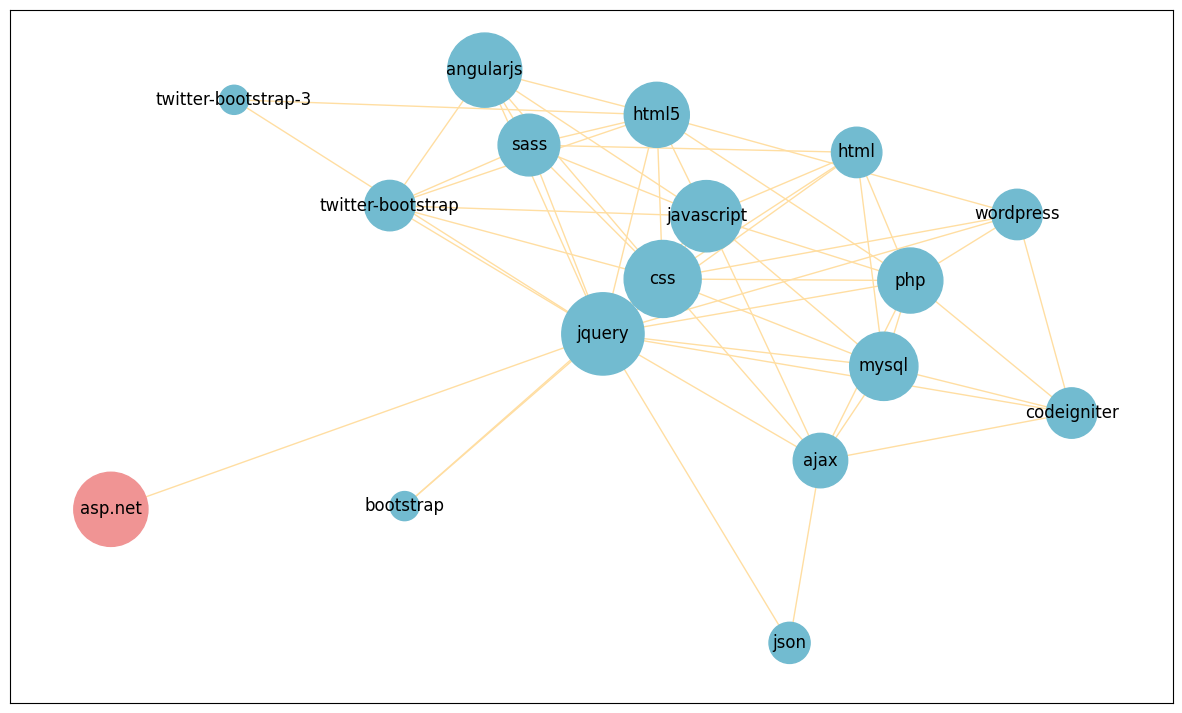

In [56]:
# Memuat data dari file yang diunggah (pastikan file tersebut sesuai dengan struktur data yang digunakan)
data = pd.read_csv('/content/Analisis-Media-Sosial/stack_network_links.csv')

# Membuat graf
G = nx.Graph()
for index, row in test.iterrows():
    G.add_node(row["name"], group=row["group"])
for index, row in data.iterrows():
    G.add_edge(row["source"], row["target"])

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menemukan node dengan degree centrality terbesar
max_centrality_node = max(degree_centrality, key=degree_centrality.get)

# Mendapatkan subgraf yang berisi node terbesar dan node-node yang berhubungan langsung dengannya
subgraph_nodes = [max_centrality_node] + list(G.neighbors(max_centrality_node))
subgraph = G.subgraph(subgraph_nodes)

# Visualisasi subgraf
def draw_subgraph_with_degree(subgraph, size):
    nodes = subgraph.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2', 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in subgraph.nodes(data=True)]

    # Menyesuaikan parameter k untuk memberikan jarak yang lebih baik antara node-node
    pos = nx.spring_layout(subgraph, k=1, iterations=100)

    # Menggunakan degree centrality untuk menentukan ukuran node
    node_degree_centrality = {node: degree_centrality[node] for node in nodes}

    # Skala ukuran node bergantung pada nilai degree centrality masing-masing nodes
    node_size = [node_degree_centrality[node] * 25000 for node in nodes]

    plt.figure(figsize=size)
    nx.draw_networkx(subgraph, pos=pos, node_color=node_color, node_size=node_size, edge_color='#FFDEA2', width=1)
    plt.show()

draw_subgraph_with_degree(subgraph, size=(15, 9))


**Mengidentifikasi tag jquery sebagai simpul yang memiliki nilai tertinggi dalam semua perhitungan centrality. Disini kita lihat sebagai subgraf dimana antar simpul hampir terhubung satu sama lain. Hal ini menciptakan koneksi yang kuat yang terhubung ke simpul jquery.**

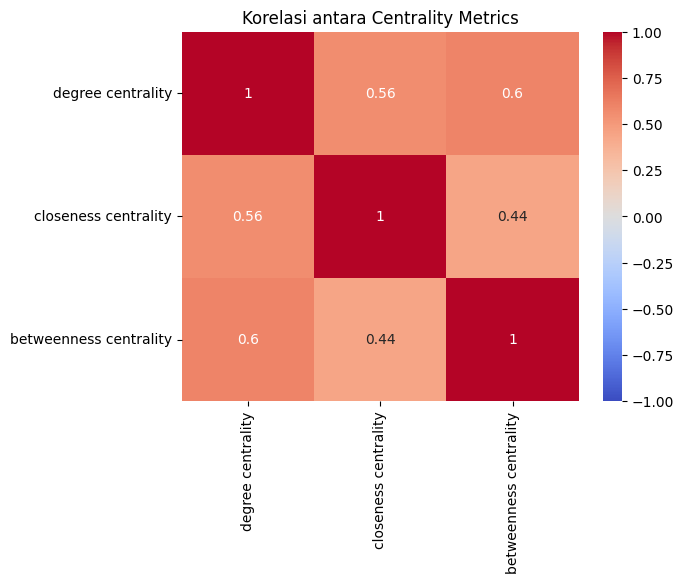

In [57]:
# Menggabungkan ketiga centrality dalam satu DataFrame
centrality_df = degree_df.merge(closeness_df[['Node', 'closeness centrality']], on='Node') # Gabung kolom degree dengan kolom closeness
centrality_df = centrality_df.merge(betweenness_df[['Node', 'betweenness centrality']], on='Node') # Gabung kolom degree + closeness dengan kolom betweenness

# Menghitung korelasi
correlation_matrix = centrality_df[['degree centrality', 'closeness centrality', 'betweenness centrality']].corr()

# Visualisasi korelasi heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Centrality Metrics')
plt.show()

**Dari heatmap korelasi ini terlihat bahwa antar perhitungan centrality memiliki korelasi yang positif, dimana jika suatu centrality memiliki nilai yang tinggi, maka di centrality lain pun memiliki centrality yang tinggi juga.**